In [1]:
### Setup the RADAR parameters

In [1]:
Pavg = 100e3        # Basic Power level output of the radar
Gt = 15             # Scalar Gain of TX antenna
Gr = Gt             # Scalar Gain of RX antenna  if Gr == Gt same antenna
fc = 1e3            # Carrier Frequency, Center Frequency
#vp = 3e8            # Phase Velocity of the EM wave
vp = 343            # Phase Velocity of sound
NF = 1              # Receiver Noise Figure
T  = 1/fc           # period of one Carrier Frequency
#derived values
Lambda = vp/fc

print(T)

# Setup Time portion
PRF = 0.05           # Pulses per second (hertz)
PRI = 1/PRF         # Pulse Repetition Interval (seconds)
R_unamb = PRI *vp/2 # Unambiguous Range
print(R_unamb)

#Num cycles per pulse packet
k = 20             # k cycles of fc in the pulse packet
PW = k*T            # k cycles * Period of fc
BW = 1/PW           # Bandwidth of the RADAR Pulse
print(PW)

# error check
if PW >= PRI:
    print('Error: Pulse width much too long -- PRI: {}, PW = {}'.format(PRI, PW))


0.001
3430.0
0.02


In [3]:
import pyaudio
import wave
import sys
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

import librosa
import librosa.display

import pylab

# recording configs
CHUNK = 2048
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 96000
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

# create & configure microphone
mic = pyaudio.PyAudio()
stream = mic.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)



# read & store microphone data per frame read
frames = []
trigger = 0
sleep(0.01)
while trigger < 20000:
    dataTrig = stream.read(CHUNK)
    decoded = np.frombuffer(dataTrig,dtype=np.int16);
    trigger = np.amax(decoded)
    display(trigger)
    sleep(0.001)

print("* recording")

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    numpydata = np.frombuffer(data,dtype=np.int16)
    frames.append(data)

print("* done recording")


# kill the mic and recording
stream.stop_stream()
stream.close()
mic.terminate()


3968

3408

4803

2459

4293

3937

4093

5928

6156

-186

4521

3644

1816

1582

3280

1929

4066

3091

2044

5279

4470

2438

4199

1950

4818

4422

3951

2356

5526

3238

3442

2990

2157

2485

3576

639

2753

912

1031

4649

2231

4517

3939

3630

3049

3575

1339

2029

3345

1512

2283

2845

2317

1338

2914

2354

3732

4885

1635

5738

3096

2886

4006

2240

2727

2020

2655

1696

2888

2512

2521

2807

2070

4071

4084

443

5179

4363

1903

2580

3179

1979

2817

2495

3932

1421

2205

2156

5391

2390

3349

3865

1618

3680

4376

3068

2389

4293

3987

1809

3081

6061

3841

1089

3304

83

1558

2248

3989

552

2153

3213

1336

4133

2339

1027

2313

5669

2734

2840

4276

2882

4010

2984

2970

4894

1793

3788

5280

1175

3408

3331

4320

3360

3726

1935

4510

5155

5582

3048

3699

1782

3974

1275

4583

3942

1373

3628

2747

2837

3297

2858

3385

1276

3186

3263

2898

7450

3174

5276

1444

2320

3415

2858

2959

2946

1543

3691

2205

3245

4281

2410

1362

3771

2845

2101

3600

1410

3170

5423

2208

1604

2468

789

3205

2498

2295

349

2044

4155

4029

3854

2936

3160

3588

4812

5139

2358

3065

3580

2745

1821

3721

1645

2911

1509

2134

2024

1481

2909

2835

4942

-530

4427

1664

2893

1586

1754

1542

3539

3105

1915

1528

2478

12809

4100

2978

5039

2982

5625

4883

2506

1471

3152

2345

3256

1916

1329

2414

3965

2069

3388

3088

3429

3305

3343

-72

4990

3836

1142

3703

1052

2617

2985

3739

1382

4775

2999

3213

1823

1631

2682

3520

762

6125

5138

5118

3634

2443

3329

4216

4646

5215

5733

5941

3875

6754

2899

4782

4616

1878

4642

2272

1922

4151

6376

3075

3876

4236

4875

5881

8385

8718

7186

4305

4520

3046

4356

4789

2821

2548

4336

4892

8097

7791

5900

5051

5717

2087

3549

4187

8302

4879

3213

3072

4129

3319

2383

6980

5677

1705

1585

1742

1494

2911

4566

3398

3142

1439

5049

5032

5878

6647

5458

5758

6971

9150

6236

8741

5465

6461

6879

4874

4178

4660

2791

3146

5328

2470

5583

5599

3120

4284

3696

2446

4084

2014

3500

2156

1842

1682

4211

4281

3716

7362

6487

8920

7713

5170

7409

6987

8293

6108

3099

2417

4668

2384

2908

3323

4157

2988

4145

4701

7327

8198

8689

4579

4100

2707

2929

4677

2645

2828

3206

2521

2324

4389

1945

4351

4712

2849

3772

1743

3276

1322

2049

1659

1709

4024

209

3674

5494

5363

6464

2659

10051

3377

3690

6481

-658

2878

4572

1540

3732

4196

2622

3369

2519

2846

1919

2547

777

3926

660

2558

3190

4381

32567

* recording
* done recording


In [4]:
#combine & store all microphone data to output.wav file
outputFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
outputFile.setnchannels(CHANNELS)
outputFile.setsampwidth(mic.get_sample_size(FORMAT))
outputFile.setframerate(RATE)
outputFile.writeframes(b''.join(frames))
outputFile.close()


# Plot
time = np.arange(0, float(numpydata.shape[0]), 1) / RATE
#plt.plot(time, numpydata)

# SciPy Import
import scipy.io.wavfile
rate,audData=scipy.io.wavfile.read('output.wav')

#the sample rate is the number of bits of infomration recorded per second
print(rate)
print(audData)

#wav bit type the amount of information recorded in each bit often 8, 16 or 32 bit
audData.dtype

#wav length
len_PRI = audData.shape[0] / rate

#wav number of channels mono/stereo 
audData.shape[1]

#if stereo grab both channels
channel1=audData #left 
# channel2=audData[:,1] #right

# FFT
# from numpy import fft as fft
# fourier=fft.fft(channel1)
# plt.plot(fourier, color='#ff7f00')
# plt.xlabel('k')
# plt.ylabel('Amplitude')



96000
[[ 17326 -21988]
 [  9477 -26167]
 [   337 -29547]
 ...
 [ -2561  -2911]
 [ -2531  -2771]
 [ -2476  -2539]]


In [5]:
# N Observations Effect
# provide n observation effects
channel1_env = channel1.reshape(RECORD_SECONDS+1, 159744)
# add them all together
n_obs_channel1_env = channel1_env.sum(axis=0)

print(len(channel1))
print(len(n_obs_channel1_env))

479232
159744


343.0

31948

Text(0, 0.5, 'Power in Watts')

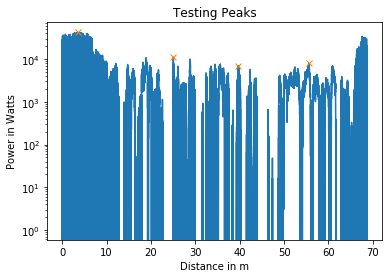

In [6]:
from scipy.signal import find_peaks

dBm = -100 #dBm
scalar = 1e-3 * np.power(10,(dBm/10))
#height = scalar

peaks, _ = find_peaks(n_obs_channel1_env, height=scalar, distance=5e3)
# peaks2 = np.clip(n_obs_main_trace_env, a_min=scalar, a_max=None)
peaks2 = peaks * R_unamb/(len(n_obs_channel1_env))

# make the distance vector
nsamps = int(len(n_obs_channel1_env)/5)
x = np.linspace(0,R_unamb/5, nsamps)
dx = R_unamb/nsamps/5
display(R_unamb)
display(nsamps)

peaks = peaks[0:int(len(peaks)/5)]

plt.semilogy(x,n_obs_channel1_env[0:nsamps])
plt.semilogy(peaks*dx,n_obs_channel1_env[peaks], 'x')
plt.title('Testing Peaks')
plt.xlabel('Distance in m')
plt.ylabel('Power in Watts')

In [7]:
# Peaks 2
#peaks3, _ = find_peaks(n_obs_channel1_env, height=scalar, distance=5e3)
#time3 = np.arange(0, len(n_obs_channel1_env), 1) / rate 
#display(peaks3)
#plt.plot(n_obs_channel1_env[peaks3], 'x')
#peaks = plt.semilogy(time2, n_obs_channel1_env[peaks3], linewidth=0.02, alpha=2.0, ls='x', color='#FF0000', label="Peaks")

159744
26624
26624
479232
479232


<Figure size 432x288 with 0 Axes>

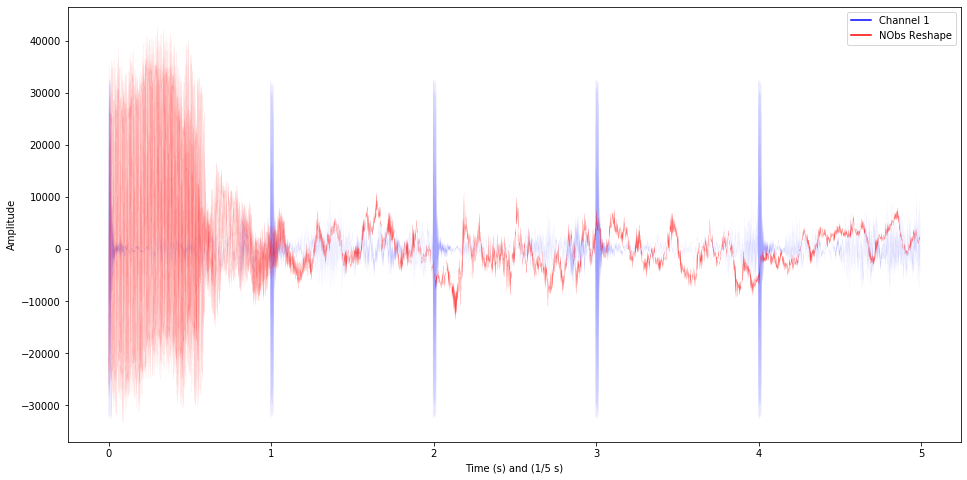

In [8]:
# PLOT
time = np.arange(0, float(audData.shape[0]), 1) / rate 
time2 = np.arange(0, float(audData.shape[0]/(3*6)), 1) / rate*3*6 

print(len(n_obs_channel1_env))
print(len(n_obs_channel1_env[0:26624]))
print(len(time2))
print(len(channel1))
print(len(time))

#plot amplitude (or loudness) over time
plt.clf()
plt.figure(figsize=(16,8))
channel1fig = plt.plot(time, channel1, linewidth=0.02, alpha=0.4, color='#0000FF', label="Channel 1")
NObsReshape = plt.plot(time2, n_obs_channel1_env[0:26624], linewidth=0.04, alpha=1.0, color='#FF0000', label="NObs Reshape")

plt.xlabel('Time (s) and (1/5 s)')
plt.ylabel('Amplitude')

# defining legend style and data
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='blue', label='Channel 1')
reds_line = mlines.Line2D([], [], color='red', label='NObs Reshape')

plt.legend(handles=[blue_line, reds_line],loc='upper right')